# Analyse AV Classification

Check the statistics on the generated CSV from 1.0

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

av_class = pd.read_csv('data/mined_data/pe32_static_av.csv', dtype=str)
av_class = av_class.set_index('link')

# Calculate the presence of each AV
av_presence = av_class.count() / len(av_class)
print('Statistics on the vendors presence:')
display(av_presence.describe())
display(av_presence)
# Calculate vendors that classify over 70% of samples
high_vendors = av_presence[av_presence > 0.7].sort_values(ascending=False)
print('High presence vendors')
display(high_vendors)

Statistics on the vendors presence:


count    96.000000
mean      0.402133
std       0.323634
min       0.000010
25%       0.007171
50%       0.535635
75%       0.718583
max       0.732732
dtype: float64

a-squared               0.005897
ad-aware                0.634213
aegislab                0.583592
agnitum                 0.635263
ahnlab                  0.000695
ahnlab-v3               0.717268
alibaba                 0.321557
alyac                   0.339191
antivir                 0.341543
antivir7                0.000015
antiy-avl               0.719556
arcabit                 0.240283
authentium              0.007660
avast                   0.728300
avast5                  0.005058
avg                     0.727772
avira                   0.365880
avware                  0.371764
baidu                   0.091387
baidu-international     0.634681
bitdefender             0.732663
bkav                    0.650439
bytehero                0.629173
cat-quickheal           0.732650
clamav                  0.730660
cmc                     0.600176
command                 0.000335
commtouch               0.332993
comodo                  0.728617
crowdstrike             0.013565
          

High presence vendors


thehacker               0.732732
bitdefender             0.732663
cat-quickheal           0.732650
fortinet                0.732436
virobot                 0.731994
ikarus                  0.731813
gdata                   0.731559
f-prot                  0.730681
k7antivirus             0.730665
clamav                  0.730660
mcafee                  0.730261
microsoft               0.729144
nprotect                0.728949
comodo                  0.728617
avast                   0.728300
avg                     0.727772
vba32                   0.727469
kaspersky               0.726727
mcafee-gw-edition       0.725641
symantec                0.725144
superantispyware        0.724748
trendmicro              0.721227
sophos                  0.720244
antiy-avl               0.719556
drweb                   0.718259
jiangmin                0.718215
vipre                   0.718179
ahnlab-v3               0.717268
trendmicro-housecall    0.715366
panda                   0.715062
microworld

In [2]:
display(list(high_vendors.index)[:20])
samples_top20 = av_class.filter(items=['link'] + list(high_vendors.index)[:20]).dropna()
display(len(samples_top20))

['thehacker',
 'bitdefender',
 'cat-quickheal',
 'fortinet',
 'virobot',
 'ikarus',
 'gdata',
 'f-prot',
 'k7antivirus',
 'clamav',
 'mcafee',
 'microsoft',
 'nprotect',
 'comodo',
 'avast',
 'avg',
 'vba32',
 'kaspersky',
 'mcafee-gw-edition',
 'symantec']

269563

In [3]:
samples_count = samples_top20.replace('clean', np.nan).count(1)

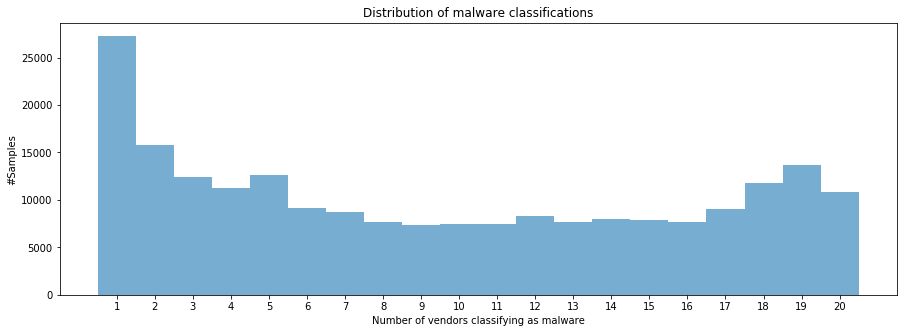

In [4]:
# display(samples_top20[samples_top20.index == 'YTllNThjNjY1MzRlNGFiYzg5ZjYzM2ExOWI3MzNjNTI'])

samples_count.hist(bins=np.arange(21)+0.5, figsize=(15, 5), alpha=0.6, grid=False)
plt.xticks(range(1, 21))
plt.xlabel('Number of vendors classifying as malware')
plt.ylabel('#Samples')
plt.title('Distribution of malware classifications')
plt.show()

In [14]:
malware = samples_top20[samples_top20.index.isin(samples_count[samples_count == 20].index)]
display(len(malware))
display(malware.apply(pd.Series.nunique))
unique_names = malware.apply(pd.Series.nunique).sort_values()
# display(unique_names)
# display(unique_names.describe())
# unique_names.plot(kind='bar', figsize=(15, 5), alpha=0.6, xticks=np.arange(len(unique_names)))
# plt.xticks(rotation='vertical')
# plt.xlabel('Anti-virus Vendor')
# plt.ylabel('Number of unique names')
# plt.title('Unique names in malware samples')
# plt.show()



10868

thehacker            3090
bitdefender          3223
cat-quickheal        2286
fortinet             2144
virobot              3617
ikarus               1139
gdata                3227
f-prot               2515
k7antivirus          1869
clamav               3195
mcafee               2560
microsoft            1644
nprotect             4332
comodo               1959
avast                1570
avg                  2644
vba32                1366
kaspersky            2572
mcafee-gw-edition    2436
symantec              667
dtype: int64

In [29]:
# display(test.value_counts()/len(test))
table = pd.DataFrame(index=['Unique names', '1st most used', '2nd most used', '3rd most used', '4th most used',
                            '5th most used', '6th most used', '7th most used', '8th most used',
                            '9th most used', '10th most used', 'Total'])
percent_total = 0
counter = 1
for col in malware:
    percentages = malware[col].value_counts()[:10]/len(malware)
    total = percentages.sum()
    percent_total += total
    # table['V{}'.format(counter)] = pd.Series(percentages.values, index=table.index).round(decimals=3)
    # display(list(np.concatenate(([unique_names[col]], percentages.values, [0]))))
    table[col] = pd.Series(np.concatenate(([unique_names[col]], percentages.values, [percentages.sum()])), index=table.index).round(decimals=3)
    # counter += 1
    # display(percentages.values)
    # display(round(total, 3))
    
display(percent_total / 20)
display(table)

table[table.columns[10:]].to_latex(buf='test.tex')
# table.to_latex(buf='test.tex')

0.28712274567537721

,thehacker,bitdefender,cat-quickheal,fortinet,virobot,ikarus,gdata,f-prot,k7antivirus,clamav,mcafee,microsoft,nprotect,comodo,avast,avg,vba32,kaspersky,mcafee-gw-edition,symantec
Unique names,3090.000,3223.000,2286.000,2144.000,3617.000,1139.000,3227.000,2515.000,1869.000,3195.000,2560.000,1644.000,4332.000,1959.000,1570.000,2644.000,1366.000,2572.000,2436.000,667.000
1st most used,0.068,0.066,0.063,0.057,0.063,0.075,0.066,0.052,0.042,0.026,0.069,0.064,0.060,0.068,0.068,0.044,0.069,0.064,0.051,0.071
2nd most used,0.047,0.047,0.052,0.050,0.028,0.040,0.047,0.035,0.035,0.022,0.037,0.040,0.030,0.061,0.062,0.032,0.030,0.052,0.036,0.060
3rd most used,0.039,0.029,0.040,0.032,0.027,0.028,0.029,0.032,0.030,0.022,0.030,0.030,0.025,0.050,0.058,0.031,0.025,0.046,0.024,0.060
4th most used,0.030,0.025,0.030,0.027,0.025,0.027,0.025,0.030,0.029,0.017,0.030,0.028,0.020,0.036,0.043,0.025,0.025,0.041,0.024,0.053
5th most used,0.025,0.020,0.028,0.027,0.022,0.023,0.020,0.029,0.023,0.017,0.028,0.027,0.018,0.031,0.042,0.023,0.023,0.030,0.019,0.033
6th most used,0.021,0.019,0.024,0.025,0.015,0.021,0.019,0.028,0.023,0.017,0.028,0.025,0.016,0.028,0.030,0.017,0.022,0.028,0.018,0.032
7th most used,0.019,0.017,0.023,0.019,0.013,0.017,0.017,0.026,0.023,0.017,0.024,0.025,0.016,0.027,0.024,0.017,0.017,0.025,0.017,0.032
8th most used,0.018,0.017,0.021,0.018,0.013,0.016,0.017,0.019,0.021,0.015,0.019,0.025,0.014,0.021,0.019,0.017,0.016,0.021,0.016,0.030
9th most used,0.015,0.017,0.019,0.017,0.012,0.015,0.017,0.017,0.020,0.014,0.017,0.020,0.014,0.019,0.019,0.015,0.016,0.020,0.013,0.028
